# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 6.5MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx


In [0]:
downloaded_2 = drive.CreateFile({'id':id}) 
downloaded_2.GetContentFile('train_data.csv')  
project_data = pd.read_csv('train_data.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe


In [0]:
downloaded_3 = drive.CreateFile({'id':id}) 
downloaded_3.GetContentFile('resources.csv')  
resources_data = pd.read_csv('resources.csv')
# Dataset is now stored in a Pandas Dataframe

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resources_data.shape)
print(resources_data.columns.values)


Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations r n r nThe materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills r nThey also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagem

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## 1.5 Preparing data for models

In [0]:
#Pre-processing teacher prefix:-

In [0]:
project_data = project_data.replace({'teacher_prefix':np.nan},"")
a=list(project_data['teacher_prefix'].unique())

In [0]:
a.pop(4)

''

In [0]:
a

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']

In [0]:
project_data.project_grade_category = project_data.project_grade_category.str.replace('\s+','_')
project_data.project_grade_category = project_data.project_grade_category.str.replace('-','_')

In [0]:
price_data=resources_data.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()

In [0]:
project_data=pd.merge(project_data, price_data, on='id', how='left')

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [0]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [0]:
#As the total data has odd no of total data points, we will even the no of total data points so 
#that the train test split can hapeen based on the test size.

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Train-test splitting:-

In [0]:
Y = project_data['project_is_approved'].values 

In [0]:
X = project_data.drop('project_is_approved', axis=1)

In [0]:
X.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xt, Xtest, Yt, Ytest = train_test_split(X, Y, test_size=0.33, random_state=0, stratify= Y)
Xtr, Xcv, Ytr, Ycv = train_test_split(Xt, Yt, test_size=0.33, random_state=0, stratify= Yt)

In [0]:
print("The shape of training data is:")
print(Xtr.shape)
print(Ytr.shape)
print('==========')
print("The shape of test data is:")
print(Xtest.shape)
print(Ytest.shape)
print('==========')
print("The shape of CV data is:")
print(Xcv.shape)
print(Ycv.shape)

The shape of training data is:
(49041, 20)
(49041,)
The shape of test data is:
(36052, 20)
(36052,)
The shape of CV data is:
(24155, 20)
(24155,)


# Preprocessing essay data:-

In [0]:
preprocessed_1=[]
for sent in tqdm(Xtr['essay'].values):    
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_1.append(sentance.strip())


100%|██████████| 49041/49041 [00:28<00:00, 1722.96it/s]


In [0]:
preprocessed_1[1000]

'the students spark curiosity i love they interested learning change world help people i want everything i keep passion alive my classroom filled students curious excited learning they passion nature we currently working garden project also done project monarch butterflies we project based learning school students drive learn the students always choose project helping people nature these resources allow students explore passions stem gardening we love giving students time complete stem challenges get wheels turning creativity flowing we also incorporating art project making steam project the students use paints express learned this project make difference allowing students may not opportunity explore develop passion stem use stem bundles paint'

In [0]:
preprocessed_2=[]
for sent in tqdm(Xtest['essay'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_2.append(sentance.strip())


100%|██████████| 36052/36052 [00:21<00:00, 1711.59it/s]


In [0]:
preprocessed_3=[]
for sent in tqdm(Xcv['essay'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_3.append(sentance.strip())


100%|██████████| 24155/24155 [00:14<00:00, 1701.40it/s]


# Preprocessing project title data:-

In [0]:
preprocessed_title_1=[]
for sent in tqdm(Xtr['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_1.append(sentance.strip())


100%|██████████| 49041/49041 [00:01<00:00, 37961.06it/s]


In [0]:
preprocessed_title_2=[]
for sent in tqdm(Xtest['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_2.append(sentance.strip())


100%|██████████| 36052/36052 [00:00<00:00, 37698.46it/s]


In [0]:
preprocessed_title_3=[]
for sent in tqdm(Xcv['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_3.append(sentance.strip())


100%|██████████| 24155/24155 [00:00<00:00, 36923.29it/s]


# Features to be considered 
We are going to consider

school_state : categorical data
clean_categories : categorical data
clean_subcategories : categorical data
project_grade_category : categorical data
teacher_prefix : categorical data

project_title : text data

text : text data

project_resource_summary: text data (optinal)

quantity : numerical (optinal)

sentiment's score of essay data

teacher_number_of_previously_posted_projects : numerical

price : numerical

number of words in essay

number of words in projects_title

# 1.5.1 Vectorizing Categorical data

In [0]:
def response_coding(df1, df2, df3, output, feature):
    column = df1[feature].value_counts()
    
    column_1 = df1[df1[output]==1][feature].value_counts()
    
    column_0 = df1[df1[output]==0][feature].value_counts()
    
    column = dict(column)
    column_1 = dict(column_1)
    column_0 = dict(column_0)
    
    dict_1=dict()
    for i in column:
        for j in column_1:
            if i==j:
                dict_1[i]=(column_1[i]/column[i])
    
    
    dict_0=dict()
    for i in column:
        for j in column_0:
            if i==j:
                dict_0[i]=(column_0[i]/column[i])
    
    
    return np.array([list(df1[feature].map(dict_0))]), np.array([list(df1[feature].map(dict_1))]), np.array([list(df2[feature].map(dict_0))]), np.array([list(df2[feature].map(dict_1))]), np.array([list(df3[feature].map(dict_0))]), np.array([list(df3[feature].map(dict_1))])

In [0]:
X_train = project_data[:49041]
X_cv = project_data[49041:73196]
X_test = project_data[73196:]

# Response Coding for categorical variables:-

In [0]:
prefix_train_0, prefix_train_1, prefix_cv_0, prefix_cv_1, prefix_test_0, prefix_test_1 = response_coding(df1=X_train, df2=X_cv, df3=X_test, output='project_is_approved', feature='teacher_prefix')

In [0]:
state_train_0, state_train_1, state_cv_0, state_cv_1, state_test_0, state_test_1 = response_coding(df1=X_train, df2=X_cv, df3=X_test, output='project_is_approved', feature='school_state')

In [0]:
grade_train_0, grade_train_1, grade_cv_0, grade_cv_1, grade_test_0, grade_test_1 = response_coding(df1=X_train, df2=X_cv, df3=X_test, output='project_is_approved', feature='project_grade_category')

In [0]:
categories_train_0, categories_train_1, categories_cv_0, categories_cv_1, categories_test_0, categories_test_1 = response_coding(df1=X_train, df2=X_cv, df3=X_test, output='project_is_approved', feature='clean_categories')

In [0]:
sub_categories_train_0, sub_categories_train_1, sub_categories_cv_0, sub_categories_cv_1, sub_categories_test_0, sub_categories_test_1 = response_coding(df1=X_train, df2=X_cv, df3=X_test, output='project_is_approved', feature='clean_subcategories')

Removing the NAN values from the response coded features:-

In [0]:
from numpy import *

In [0]:
def nan(a):
  where_is_nan = isnan(a)
  a[where_is_nan] = 0
  
  return a

In [0]:
prefix_train_0 = nan(prefix_train_0); prefix_train_1 = nan(prefix_train_1); prefix_test_0 = nan(prefix_test_0); prefix_test_1 = nan(prefix_test_1); prefix_cv_0 = nan(prefix_cv_0); prefix_cv_1 = nan(prefix_cv_1)

In [0]:
state_train_0 = nan(state_train_0); state_train_1 = nan(state_train_1); state_test_0 = nan(state_test_0); state_test_1 = nan(state_test_1); state_cv_0 = nan(state_cv_0); state_cv_1 = nan(state_cv_1)

In [0]:
grade_train_0 = nan(grade_train_0); grade_train_1 = nan(grade_train_1); grade_test_0 = nan(grade_test_0); grade_test_1 = nan(grade_test_1); grade_cv_0 = nan(grade_cv_0); grade_cv_1 = nan(grade_cv_1)

In [0]:
categories_train_0 = nan(categories_train_0); categories_train_1 = nan(categories_train_1); categories_test_0 = nan(categories_test_0); categories_test_1 = nan(categories_test_1); categories_cv_0 = nan(categories_cv_0); categories_cv_1 = nan(categories_cv_1)

In [0]:
sub_categories_train_0 = nan(sub_categories_train_0); sub_categories_train_1 = nan(sub_categories_train_1); sub_categories_test_0 = nan(sub_categories_test_0); sub_categories_test_1 = nan(sub_categories_test_1); sub_categories_cv_0 = nan(sub_categories_cv_0); sub_categories_cv_1 = nan(sub_categories_cv_1)

In [0]:
prefix_cv_0.shape

(1, 24155)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

1. Essay data:- 

In [0]:
vectorizer_6 = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_6.fit(preprocessed_1)
bow1=vectorizer_6.transform(preprocessed_1)
bow2=vectorizer_6.transform(preprocessed_2)
bow3=vectorizer_6.transform(preprocessed_3)


In [0]:
print(bow1.shape)
print(bow2.shape)
print(bow3.shape)

(49041, 5000)
(36052, 5000)
(24155, 5000)


2. Project title:-

In [0]:
vectorizer_7 = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_7.fit(preprocessed_title_1)
bow4=vectorizer_7.transform(preprocessed_title_1)
bow5=vectorizer_7.transform(preprocessed_title_2)
bow6=vectorizer_7.transform(preprocessed_title_3)


In [0]:
print(bow4.shape)
print(bow5.shape)
print(bow6.shape)

(49041, 3756)
(36052, 3756)
(24155, 3756)


#### 1.5.2.2 TFIDF vectorizer

1. Essay data:-

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_8 = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_8.fit(preprocessed_1)
tfidf_1 = vectorizer_8.transform(preprocessed_1)
tfidf_2 = vectorizer_8.transform(preprocessed_2)
tfidf_3 = vectorizer_8.transform(preprocessed_3)
print('The shape of essay tfidf train data is',tfidf_1.shape)
print('The shape of essay tfidf test data is',tfidf_2.shape)
print('The shape of essay tfidf CV data is',tfidf_3.shape)

The shape of essay tfidf train data is (49041, 5000)
The shape of essay tfidf test data is (36052, 5000)
The shape of essay tfidf CV data is (24155, 5000)


2. Project Title:- 

In [0]:
vectorizer_9 = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_9.fit(preprocessed_title_1)
tfidf_4=vectorizer_9.transform(preprocessed_title_1)
tfidf_5=vectorizer_9.transform(preprocessed_title_2)
tfidf_6=vectorizer_9.transform(preprocessed_title_3)


In [0]:
print(tfidf_4.shape)
print(tfidf_5.shape)
print(tfidf_6.shape)

(49041, 3756)
(36052, 3756)
(24155, 3756)


In [0]:
if not os.path.exists('glove.6B.zip'):
    ! wget http://nlp.stanford.edu/data/glove.6B.zip
if not os.path.exists('glove.6B.300d.txt'):
    ! unzip glove.6B.zip

--2019-09-01 10:34:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-09-01 10:34:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-09-01 10:34:07--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

# 3. AVG W2V:-

In [0]:
preprocessed = preprocessed_1 + preprocessed_2 + preprocessed_3
preprocessed_title = preprocessed_title_1 + preprocessed_title_2 + preprocessed_title_3


# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.6B.300d.txt')

# ============================

# ============================

words = []
for i in preprocessed:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




1024it [00:00, 10235.13it/s]

Loading Glove Model


400000it [00:41, 9754.29it/s]


Done. 400000  words loaded!
all the words in the coupus 16975547
the unique words in the coupus 58763
The number of words that are present in both glove vectors and our coupus 44229 ( 75.267 %)
word 2 vec length 44229


In [0]:
words = []
for i in preprocessed:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




all the words in the coupus 16975547
the unique words in the coupus 58763
The number of words that are present in both glove vectors and our coupus 44229 ( 75.267 %)
word 2 vec length 44229


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

Avg_W2V on Essay:-

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_1.append(vector)

print(len(avg_w2v_vectors_1))
print(len(avg_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [00:17<00:00, 2778.15it/s]

49041
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_2.append(vector)

print(len(avg_w2v_vectors_2))
print(len(avg_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [00:12<00:00, 2836.11it/s]

36052
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_3.append(vector)

print(len(avg_w2v_vectors_3))
print(len(avg_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:08<00:00, 2752.22it/s]

24155
300


Avg_W2V on Project_title:-

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_1.append(vector)

print(len(avg_w2v_title_1))
print(len(avg_w2v_title_1[0]))

100%|██████████| 49041/49041 [00:00<00:00, 53932.45it/s]

49041
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_2.append(vector)

print(len(avg_w2v_title_2))
print(len(avg_w2v_title_2[0]))

100%|██████████| 36052/36052 [00:00<00:00, 54974.43it/s]

36052
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_3.append(vector)

print(len(avg_w2v_title_3))
print(len(avg_w2v_title_3[0]))

100%|██████████| 24155/24155 [00:00<00:00, 54680.60it/s]

24155
300


TFIDF W2V on Essay:-

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_1 = TfidfVectorizer()
tfidf_model_1.fit(preprocessed_1)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_1 = dict(zip(tfidf_model_1.get_feature_names(), list(tfidf_model_1.idf_)))
tfidf_words_1 = set(tfidf_model_1.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_1.append(vector)

print(len(tfidf_w2v_vectors_1))
print(len(tfidf_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [01:49<00:00, 446.12it/s]

49041
300


In [0]:
tfidf_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_2.append(vector)

print(len(tfidf_w2v_vectors_2))
print(len(tfidf_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [01:20<00:00, 447.34it/s]

36052
300


In [0]:
tfidf_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_3.append(vector)

print(len(tfidf_w2v_vectors_3))
print(len(tfidf_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:55<00:00, 438.82it/s]

24155
300


Tf-idf W2V on project_title:-

In [0]:
tfidf_title_model_1 = TfidfVectorizer()
tfidf_title_model_1.fit(preprocessed_title_1)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary1 = dict(zip(tfidf_title_model_1.get_feature_names(), list(tfidf_title_model_1.idf_)))
tfidf_title_words_1 = set(tfidf_title_model_1.get_feature_names())

In [0]:
tfidf_title_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_1.append(vector)

print(len(tfidf_title_w2v_vectors_1))
print(len(tfidf_title_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [00:01<00:00, 25892.87it/s]

49041
300


In [0]:
tfidf_title_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_2.append(vector)

print(len(tfidf_title_w2v_vectors_2))
print(len(tfidf_title_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [00:01<00:00, 27189.02it/s]

36052
300


In [0]:
tfidf_title_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_3.append(vector)

print(len(tfidf_title_w2v_vectors_3))
print(len(tfidf_title_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:00<00:00, 26910.27it/s]

24155
300


In [0]:
np.array(tfidf_title_w2v_vectors_1).shape

(49041, 300)

### 1.5.3 Vectorizing Numerical features

Vectorizing price data:-

In [0]:
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(1,-1)

price_scalar = Normalizer()
price_scalar.fit(Xtr['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_1 = price_scalar.transform(Xtr['price'].values.reshape(1, -1))
price_standardized_2 = price_scalar.transform(Xtest['price'].values.reshape(1, -1))
price_standardized_3 = price_scalar.transform(Xcv['price'].values.reshape(1, -1))

print(price_standardized_1.shape)
print(price_standardized_2.shape)
print(price_standardized_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
price_standardized_1

array([[0.00893773, 0.00095084, 0.00174673, ..., 0.00453539, 0.00366684,
        0.00254176]])

Vectorizing previous projects data:-

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

previousproject_scalar = Normalizer()
previousproject_scalar.fit(Xtr['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previousproject_standardized_1 = previousproject_scalar.transform(Xtr['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previousproject_standardized_2 = previousproject_scalar.transform(Xtest['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previousproject_standardized_3 = previousproject_scalar.transform(Xcv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print(previousproject_standardized_1.shape)
print(previousproject_standardized_2.shape)
print(previousproject_standardized_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
previousproject_standardized_1

array([[0.        , 0.        , 0.00045655, ..., 0.00060873, 0.00045655,
        0.00076092]])

Vectorizing price data:-

In [0]:
from sklearn.preprocessing import Normalizer

quantity_vect=Normalizer()
quantity_vect_1=quantity_vect.fit_transform(Xtr['quantity'].values.reshape(1,-1))
quantity_vect_2=quantity_vect.transform(Xtest['quantity'].values.reshape(1,-1))
quantity_vect_3=quantity_vect.transform(Xcv['quantity'].values.reshape(1,-1))
print(quantity_vect_1.shape)
print(quantity_vect_2.shape)
print(quantity_vect_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
(quantity_vect_1)

array([[0.00070946, 0.00496619, 0.00014189, ..., 0.00042567, 0.00042567,
        0.00014189]])

### 1.5.4 Merging all the above features

- We need to merge all the numerical vectors i.e catogorical, text, numerical vectors

Set-1 :-

In [0]:
from scipy.sparse import hstack
X_train_1 = hstack((prefix_train_0.T, prefix_train_1.T, state_train_0.T, state_train_1.T, grade_train_0.T, grade_train_1.T, categories_train_0.T, categories_train_1.T, sub_categories_train_0.T, sub_categories_train_1.T, bow1, bow4, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_1.shape

(49041, 8769)

In [0]:
from scipy.sparse import hstack
X_test_1 = hstack((prefix_test_0.T, prefix_test_1.T, state_test_0.T, state_test_1.T, grade_test_0.T, grade_test_1.T, categories_test_0.T, categories_test_1.T, sub_categories_test_0.T, sub_categories_test_1.T, bow2, bow5, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_1.shape

(36052, 8769)

In [0]:
from scipy.sparse import hstack
X_cv_1 = hstack((prefix_cv_0.T, prefix_cv_1.T, state_cv_0.T, state_cv_1.T, grade_cv_0.T, grade_cv_1.T, categories_cv_0.T, categories_cv_1.T, sub_categories_cv_0.T, sub_categories_cv_1.T, bow3, bow6, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_1.shape

(24155, 8769)

Set-2 :-

In [0]:
from scipy.sparse import hstack
X_train_2 = hstack((prefix_train_0.T, prefix_train_1.T, state_train_0.T, state_train_1.T, grade_train_0.T, grade_train_1.T, categories_train_0.T, categories_train_1.T, sub_categories_train_0.T, sub_categories_train_1.T, tfidf_1, tfidf_4, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_2.shape

(49041, 8769)

In [0]:
from scipy.sparse import hstack
X_test_2 = hstack((prefix_test_0.T, prefix_test_1.T, state_test_0.T, state_test_1.T, grade_test_0.T, grade_test_1.T, categories_test_0.T, categories_test_1.T, sub_categories_test_0.T, sub_categories_test_1.T, tfidf_2, tfidf_5, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_2.shape

(36052, 8769)

In [0]:
from scipy.sparse import hstack
X_cv_2 = hstack((prefix_cv_0.T, prefix_cv_1.T, state_cv_0.T, state_cv_1.T, grade_cv_0.T, grade_cv_1.T, categories_cv_0.T, categories_cv_1.T, sub_categories_cv_0.T, sub_categories_cv_1.T, tfidf_3, tfidf_6, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_2.shape

(24155, 8769)

Set-3 :-

In [0]:
from scipy.sparse import hstack
X_train_3 = np.hstack((prefix_train_0.T, prefix_train_1.T, state_train_0.T, state_train_1.T, grade_train_0.T, grade_train_1.T, categories_train_0.T, categories_train_1.T, sub_categories_train_0.T, sub_categories_train_1.T, np.array(avg_w2v_vectors_1), np.array(avg_w2v_title_1), price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_3.shape

(49041, 613)

In [0]:
from scipy.sparse import hstack
X_test_3 = np.hstack((prefix_test_0.T, prefix_test_1.T, state_test_0.T, state_test_1.T, grade_test_0.T, grade_test_1.T, categories_test_0.T, categories_test_1.T, sub_categories_test_0.T, sub_categories_test_1.T, np.array(avg_w2v_vectors_2), np.array(avg_w2v_title_2), price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_3.shape

(36052, 613)

In [0]:
from scipy.sparse import hstack
X_cv_3 = np.hstack((prefix_cv_0.T, prefix_cv_1.T, state_cv_0.T, state_cv_1.T, grade_cv_0.T, grade_cv_1.T, categories_cv_0.T, categories_cv_1.T, sub_categories_cv_0.T, sub_categories_cv_1.T, avg_w2v_vectors_3, avg_w2v_title_3, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_3.shape

(24155, 613)

Set-4 :-

In [0]:
from scipy.sparse import hstack
X_train_4 = np.hstack((prefix_train_0.T, prefix_train_1.T, state_train_0.T, state_train_1.T, grade_train_0.T, grade_train_1.T, categories_train_0.T, categories_train_1.T, sub_categories_train_0.T, sub_categories_train_1.T, np.array(tfidf_w2v_vectors_1), np.array(tfidf_title_w2v_vectors_1), price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_4.shape

(49041, 613)

In [0]:
from scipy.sparse import hstack
X_test_4 = np.hstack((prefix_test_0.T, prefix_test_1.T, state_test_0.T, state_test_1.T, grade_test_0.T, grade_test_1.T, categories_test_0.T, categories_test_1.T, sub_categories_test_0.T, sub_categories_test_1.T, np.array(tfidf_w2v_vectors_2), np.array(tfidf_title_w2v_vectors_2), price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_4.shape

(36052, 613)

In [0]:
from scipy.sparse import hstack
X_cv_4 = np.hstack((prefix_cv_0.T, prefix_cv_1.T, state_cv_0.T, state_cv_1.T, grade_cv_0.T, grade_cv_1.T, categories_cv_0.T, categories_cv_1.T, sub_categories_cv_0.T, sub_categories_cv_1.T, np.array(tfidf_w2v_vectors_3), np.array(tfidf_title_w2v_vectors_3), price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_4.shape

(24155, 613)

# Assignment: Random forests

# (I) Appyling RF on different kind of featurization as mentioned in the instructions</h2>


# 1. Applying Random Forest on BOW,<font color='red'> SET 1</font>

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
auc_1=[]
auc_2=[]


In [0]:
best_depth =  [5, 10, 100, 500, 1000]
n_estimators = [5, 10, 50, 100, 500]

In [0]:
print(X_train_1.shape)
print(Ytr.shape)

(49041, 8769)
(49041,)


Tuning Hyperparameters:-

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth):
  for j in tqdm(n_estimators):
    clf=RandomForestClassifier(max_depth=i, n_estimators=j, class_weight='balanced')
    clf.fit(X_train_1, Ytr)
    Y_1=clf.predict_proba(X_train_1)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(X_cv_1)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)

100%|██████████| 5/5 [1:04:50<00:00, 851.80s/it]



Auc values v/s hyperparameters plot:-

In [0]:
auc_1 = np.array(auc_1).reshape(len(n_estimators), len(best_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(best_depth))
print(auc_1)
print(auc_2)

[[0.65419277 0.68261779 0.74264785 0.74852537 0.76202346]
 [0.68913941 0.74844181 0.81372058 0.83335855 0.83938214]
 [0.99136533 0.99931946 0.99999993 1.         1.        ]
 [0.9932041  0.99968367 1.         1.         1.        ]
 [0.99242341 0.99971289 1.         1.         1.        ]]
[[0.63053017 0.6460144  0.68533314 0.69341576 0.70531047]
 [0.61409741 0.64715464 0.69718345 0.70475167 0.71199122]
 [0.58924441 0.62791507 0.70016541 0.71369426 0.73350108]
 [0.57656602 0.62389611 0.68760039 0.71060265 0.73239729]
 [0.57932429 0.62853927 0.68899229 0.71168061 0.73120341]]


Text(33.0, 0.5, 'max_depth')

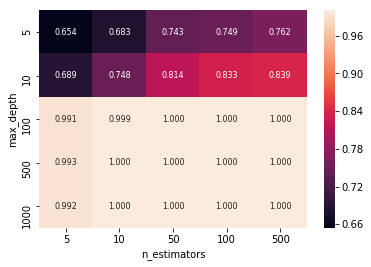

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

Text(33.0, 0.5, 'max_depth')

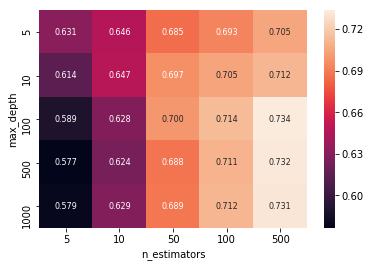

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

In [0]:
print('''From the above 2 heatmaps, (max_depth=100 & n_estimators=500) and  (max_depth=1000 & n_estimators=500) result in the best scores on both 
train and CV datasets, but we will go for  max_depth=100 & n_estimators=1000 as we do not want highly overfit models otherwise the overall 
complexity of the model will increase and the test time requirement will also increase.''')
print('='*70)
print('Hyperparameters max_depth=100 & n_estimators=500 results in train_auc=1.0 and cv_auc=0.72.')

From the above 2 heatmaps, (max_depth=100 & n_estimators=500) and  (max_depth=1000 & n_estimators=500) result in the best scores on both 
train and CV datasets, but we will go for  max_depth=100 & n_estimators=1000 as we do not want highly overfit models otherwise the overall 
complexity of the model will increase and the test time requirement will also increase.
Hyperparameters max_depth=100 & n_estimators=500 results in train_auc=1.0 and cv_auc=0.72.


# ROC Curve:-

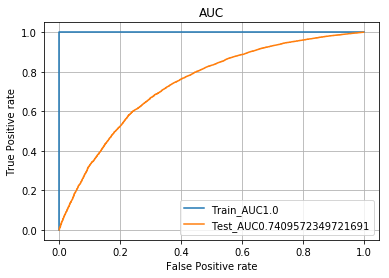

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=100, n_estimators=500, class_weight='balanced')
clf.fit(X_train_1, Ytr)
Y_1=clf.predict_proba(X_train_1)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_1)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

# Observations:-

In [0]:
print(' The AUC scores with max depth={} and n_estimators={} on train and test data are {} and {}'.format(100, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with max depth=100 and n_estimators=500 on train and test data are 1.0 and 0.7409572349721691


# Confusion Matrix on Train data:-

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=100, n_estimators=500, class_weight='balanced')
clf.fit(X_train_1, Ytr)
Y_1=clf.predict(X_train_1)
Y_2=clf.predict(X_test_1)


In [0]:
print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))


Train confusion matrix
[[ 7426     0]
 [    0 41615]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

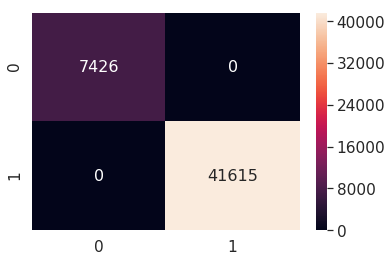

In [0]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')


# Confusion Matrix on Test data:-

In [0]:
print('Test confusion matrix')
confusion_matrix(Ytest, Y_2)

Test confusion matrix


array([[   84,  5375],
       [   62, 30531]])

In [0]:
conf_matrix_test_df1=pd.DataFrame(confusion_matrix(Ytest, Y_2))

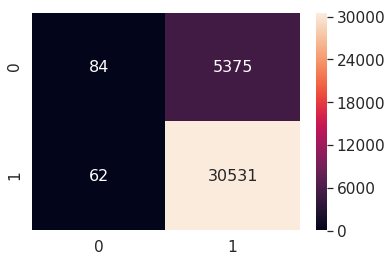

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_test_df1, annot=True, annot_kws={"size": 16}, fmt='g' )

# 2 Applying RF on TFIDF,<font color='red'> SET 2</font>

In [0]:
auc_1=[]
auc_2=[]

best_depth =  [5, 10, 100, 500, 1000]
n_estimators = [5, 10, 50, 100, 500]

print(X_train_2.shape)
print(Ytr.shape)

(49041, 8769)
(49041,)


Tuning Hyperparameters :-

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth):
  for j in tqdm(n_estimators):
    clf=RandomForestClassifier(max_depth=i, n_estimators=j, class_weight='balanced')
    clf.fit(X_train_2, Ytr)
    Y_1=clf.predict_proba(X_train_2)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(X_cv_2)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)

100%|██████████| 5/5 [1:03:50<00:00, 833.53s/it]


In [0]:

auc_1 = np.array(auc_1).reshape(len(n_estimators), len(best_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(best_depth))
print(auc_1)
print(auc_2)

[[0.63725793 0.68977957 0.74134179 0.7649075  0.77102454]
 [0.70565914 0.76081004 0.83709081 0.85423812 0.85576795]
 [0.9920547  0.99960993 1.         1.         1.        ]
 [0.99184048 0.99968874 1.         1.         1.        ]
 [0.99210428 0.99967413 1.         1.         1.        ]]
[[0.60240277 0.64613435 0.67436424 0.7038872  0.7013327 ]
 [0.61348981 0.65623517 0.69389344 0.708119   0.70931443]
 [0.5912324  0.61549242 0.68131008 0.70484512 0.72168538]
 [0.58208143 0.59973593 0.68285024 0.6952897  0.72015971]
 [0.56618573 0.61169767 0.67802236 0.70452902 0.72212725]]


# HeatMap for best hyperparameter selection:-

Text(25.499999999999996, 0.5, 'max_depth')

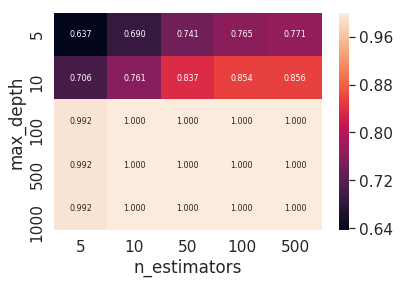

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

Text(25.499999999999996, 0.5, 'max_depth')

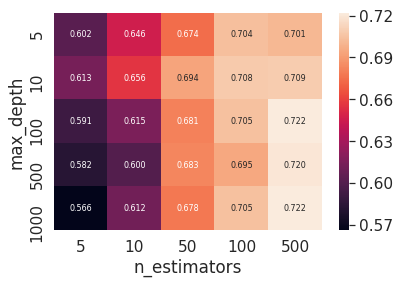

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

In [0]:
print('''From the above 2 heatmaps, (max_depth=100 & n_estimators=500) and  (max_depth=500 & n_estimators=500) result in the best scores on both 
train and CV datasets, but we will go for  max_depth=100 & n_estimators=500 as we do not want highly overfit models otherwise the overall 
complexity of the model will increase and the test time requirement will also increase.''')
print('='*140)
print('Hyperparameters max_depth=100 & n_estimators=500 results in train_auc=1.0 and cv_auc=0.723.')



From the above 2 heatmaps, (max_depth=100 & n_estimators=500) and  (max_depth=500 & n_estimators=500) result in the best scores on both 
train and CV datasets, but we will go for  max_depth=100 & n_estimators=500 as we do not want highly overfit models otherwise the overall 
complexity of the model will increase and the test time requirement will also increase.
Hyperparameters max_depth=100 & n_estimators=500 results in train_auc=1.0 and cv_auc=0.723.


# ROC Curve:-

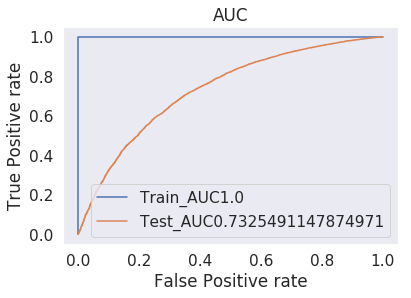

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=100, n_estimators=500, class_weight='balanced')
clf.fit(X_train_2, Ytr)
Y_1=clf.predict_proba(X_train_2)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_2)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

# Observations:-

In [0]:
print(' The AUC scores with best depth={} and n_estimators={} on train and test data are {} and {}'.format(100, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=100 and n_estimators=500 on train and test data are 1.0 and 0.7325491147874971


# Confusion Matrix on Train data:-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=100, n_estimators=500, class_weight='balanced')
clf.fit(X_train_2, Ytr)
Y_1=clf.predict(X_train_2)
Y_2=clf.predict(X_test_2)

In [0]:
conf_matrix_train2=pd.DataFrame(confusion_matrix(Ytr, Y_1))

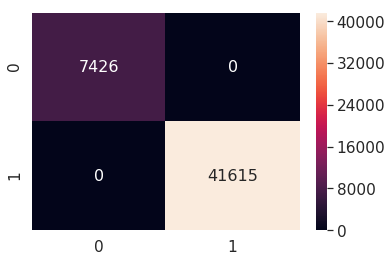

In [0]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matrix_train2, annot=True,annot_kws={"size": 16}, fmt='g')

# Confusion Matrix on Test data:-

In [0]:
confusion_matrix(Ytest, Y_2)

array([[    8,  5451],
       [   17, 30576]])

In [0]:
confusion_matrix_df2_test=pd.DataFrame(confusion_matrix(Ytest, Y_2))

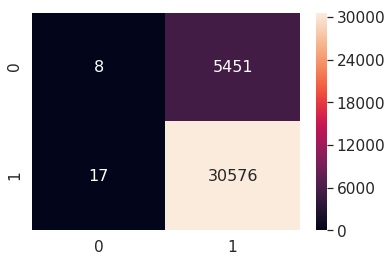

In [0]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(confusion_matrix_df2_test, annot=True,annot_kws={"size": 16}, fmt='g')

# 3. Applying RF on Avg_W2V, SET 3

In [0]:
auc_1=[]
auc_2=[]
best_depth =  [5, 10, 100, 500, 1000]
n_estimators = [5, 10, 50, 100, 500]

In [0]:
print(X_train_3.shape)
print(Ytr.shape)

(49041, 613)
(49041,)


Tuning Hyperparameters :-

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth):
  for j in tqdm(n_estimators):
    clf=RandomForestClassifier(max_depth=i, n_estimators=j, class_weight='balanced')
    clf.fit(X_train_3, Ytr)
    Y_1=clf.predict_proba(X_train_3)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(X_cv_3)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)

100%|██████████| 5/5 [1:06:32<00:00, 804.65s/it]


Heatmap for selection of best hyperparamters:-

In [0]:
auc_1 = np.array(auc_1).reshape(len(n_estimators), len(best_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(best_depth))
print(auc_1)
print(auc_2)

[[0.70218199 0.72458484 0.7459718  0.75216383 0.7558291 ]
 [0.86402092 0.91598755 0.96289892 0.96971926 0.97440341]
 [0.99161542 0.99971813 1.         1.         1.        ]
 [0.99234777 0.99975695 1.         1.         1.        ]
 [0.99221352 0.99969636 1.         1.         1.        ]]
[[0.64736891 0.66779936 0.69062961 0.69315028 0.69707893]
 [0.61729411 0.64051481 0.68720175 0.69701785 0.70609152]
 [0.55591732 0.58931143 0.64045211 0.66119542 0.69010334]
 [0.55445418 0.57699283 0.64541454 0.66274823 0.6893306 ]
 [0.55654145 0.57956436 0.64135047 0.65789693 0.68776409]]


Text(25.499999999999996, 0.5, 'max_depth')

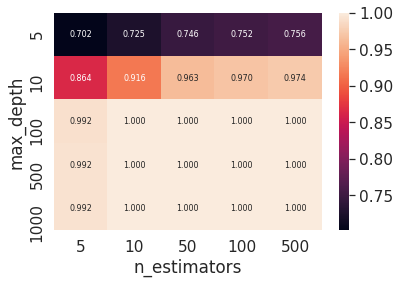

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

Text(25.499999999999996, 0.5, 'max_depth')

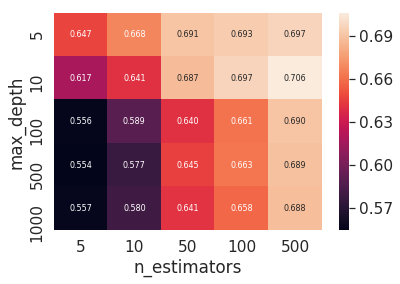

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

# Observations :-

In [0]:
print('Hyperparameters max_depth=10 & n_estimators=500 results in train_auc=0.974 and cv_auc=0.706.')


In [0]:
clf=RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
clf.fit(X_train_3, Ytr)
y_pred= clf.predict(X_test_3)
roc_auc= roc_auc_score(Ytest, y_pred)
print('The AUC score with max depth={} and n_estimators={} on test data is: {}'.format(10, 500, (roc_auc)))

The AUC score with max depth=10 and n_estimators=500 on test data is: 0.6061489707026799


# ROC on train and test data :-

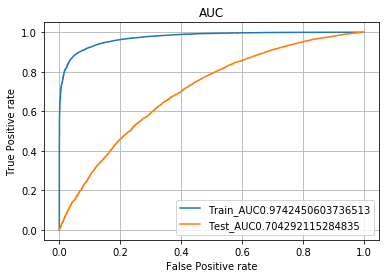

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
clf.fit(X_train_3, Ytr)
Y_1=clf.predict_proba(X_train_3)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_3)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [0]:
print(' The AUC scores with best depth={} and n_estimators={} on train and test data are {} and {}'.format(10, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=10 and n_estimators=500 on train and test data are 0.9742450603736513 and 0.704292115284835


# Confusion Matrix on Train data :-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
clf.fit(X_train_3, Ytr)
Y_1=clf.predict(X_train_3)
Y_2=clf.predict(X_test_3)

print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))

Train confusion matrix
[[ 6126  1300]
 [ 1877 39738]]


In [0]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

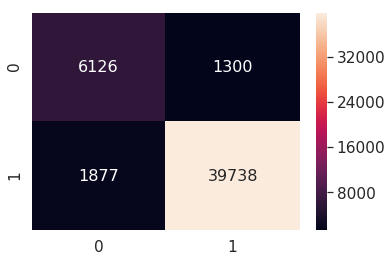

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_3, annot = True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on Test data :-

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Y_2))

[[ 1624  3835]
 [ 2668 27925]]


In [0]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

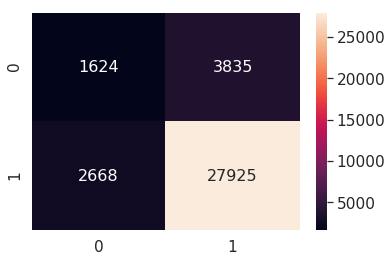

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_3, annot=True, annot_kws={'size':16}, fmt='g')

# 4. DECISION TREE On Set-4, using TFIDF_W2V:-

In [0]:
auc_1=[]
auc_2=[]
best_depth =  [5, 10, 100, 500, 1000]
n_estimators = [5, 10, 50, 100, 500]

In [0]:
print(X_train_4.shape)
print(Ytr.shape)

(49041, 613)
(49041,)


Tuning best hyperparameters:-

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(best_depth):
  for j in tqdm(n_estimators):
    clf=RandomForestClassifier(max_depth=i, n_estimators=j, class_weight='balanced')
    clf.fit(X_train_4, Ytr)
    Y_1=clf.predict_proba(X_train_4)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(X_cv_4)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)

100%|██████████| 5/5 [1:05:54<00:00, 794.86s/it]


In [0]:
auc_1 = np.array(auc_1).reshape(len(n_estimators), len(best_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(best_depth))
print(auc_1)
print(auc_2)

[[0.68936302 0.71613695 0.73614439 0.73656715 0.74216205]
 [0.85706649 0.90352829 0.9503376  0.9555056  0.96090125]
 [0.99177363 0.99971715 1.         1.         1.        ]
 [0.99262906 0.99970699 1.         1.         1.        ]
 [0.9917608  0.9996819  1.         1.         1.        ]]
[[0.65035685 0.66787089 0.68489697 0.68577203 0.68879054]
 [0.63122533 0.64937398 0.6917612  0.69137823 0.69563159]
 [0.55763076 0.57859716 0.6456607  0.65896817 0.68081027]
 [0.55184634 0.58229774 0.6444863  0.66418243 0.6838287 ]
 [0.56162311 0.59107883 0.63956737 0.66338897 0.68393769]]


Heatmap for hyperparameters selection:-

Text(0.5, 1.0, 'AUC on train data')

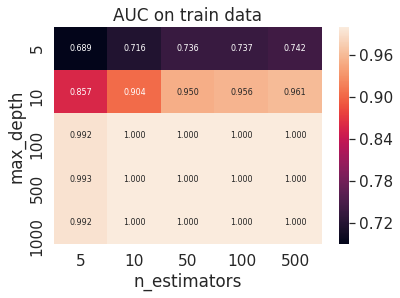

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on train data')

Text(0.5, 1.0, 'AUC on test data')

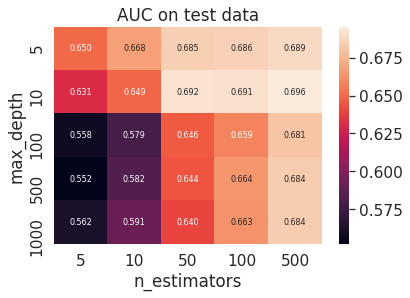

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=best_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on test data')

In [0]:
print('From the above plot, min_samples={} results on decent scores on both train and CV data'.format(500))


From the above plot, min_samples=500 results on decent scores on both train and CV data


# AUC on test data:-

In [0]:
clf=RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
clf.fit(X_train_4, Ytr)
y_pred= clf.predict(X_test_4)
roc_auc= roc_auc_score(Ytest, y_pred)
print('The AUC score with max depth={} and n_estimators={} on test data is: {}'.format(10, 500, (roc_auc)))

The AUC score with max depth=10 and n_estimators=500 on test data is: 0.6141524346494143


# ROC on train and test data:-

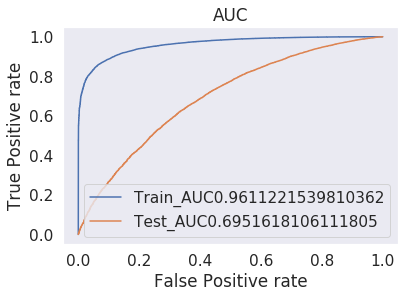

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
clf.fit(X_train_4, Ytr)
Y_1=clf.predict_proba(X_train_4)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_4)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [0]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(10, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=10 and min_split=500 on train and test data are 0.9611221539810362 and 0.6951618106111805


# Confusion Matrix on Train data :-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
clf.fit(X_train_4, Ytr)
Y_1=clf.predict(X_train_4)
Y_2=clf.predict(X_test_4)

print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))

Train confusion matrix
[[ 6361  1065]
 [ 3529 38086]]


In [0]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

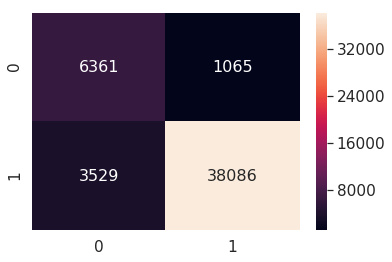

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_4, annot=True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on Test data :-

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Y_2))

[[ 1989  3470]
 [ 4118 26475]]


In [0]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

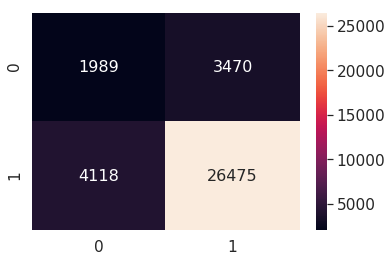

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_4, annot=True, annot_kws={'size':16}, fmt='g')

# Applying GBDT on different kind of featurizations :-

# GBDT on BOW : Set 1 :-

In [0]:
max_depth = [5, 10, 20, 50, 100] # Taking lower values because we need underfit modelss.
n_estimators = n_estimators = [5, 10, 50, 100, 500]

auc_1=[]
auc_2=[]


In [0]:
pip install xgboost

In [0]:
pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /usr/local/lib/python3.6/dist-packages (0.90)


# Tuning best Hyperparameters:-

In [0]:
from xgboost import XGBClassifier

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(max_depth):
  for j in tqdm(n_estimators):
    clf=XGBClassifier(objective="binary:logistic",max_depth=i, n_estimators=j)
    clf.fit(X_train_1, Ytr)
    Y_1=clf.predict_proba(X_train_1)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(X_cv_1)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)

100%|██████████| 5/5 [3:07:03<00:00, 2609.33s/it]


In [0]:
auc_1 = np.array(auc_1).reshape(len(n_estimators), len(max_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(max_depth))
print(auc_1)
print(auc_2)

[[0.70323064 0.71622702 0.78903669 0.83050939 0.9441316 ]
 [0.79950905 0.83148139 0.94291941 0.97379909 0.99984164]
 [0.92207446 0.96123648 0.99993836 0.99999959 1.        ]
 [0.99087456 0.99927526 1.         1.         1.        ]
 [0.99743663 0.99995218 1.         1.         1.        ]]
[[0.67199512 0.6829489  0.71786898 0.73052373 0.73933275]
 [0.68605135 0.69720492 0.72628012 0.73217536 0.73213317]
 [0.66179023 0.68007359 0.72466477 0.73098783 0.73528871]
 [0.62194658 0.64999081 0.71075793 0.72557755 0.73431848]
 [0.61836744 0.64512289 0.70821303 0.72710472 0.73558528]]


# HeatMap for best Hyperparameter selection:-

Text(0.5, 1.0, 'AUC on train data')

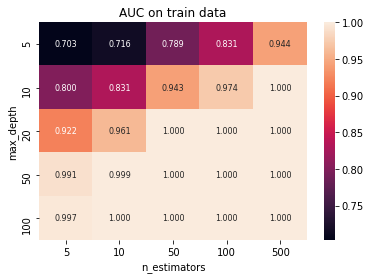

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on train data')

Text(0.5, 1.0, 'AUC on train data')

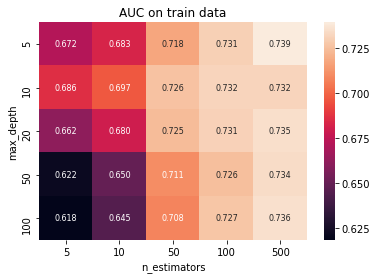

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on train data')

In [0]:
clf=XGBClassifier(max_depth=5, n_estimators=500, class_weight='balanced')
clf.fit(X_train_1, Ytr)
y_pred= clf.predict_proba(X_test_1)
roc_auc= roc_auc_score(Ytest, y_pred[:,1])
print('The AUC score with max depth={} and n_estimators={} on test data is: {}'.format(5, 500, (roc_auc)))


The AUC score with max depth=5 and n_estimators=500 on test data is: 0.7500405266990098


# ROC Curve :-

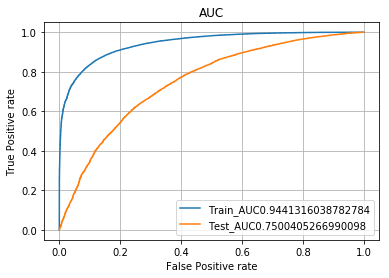

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=500)
clf.fit(X_train_1, Ytr)
Y_1=clf.predict_proba(X_train_1)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_1)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [0]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(5, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=5 and min_split=500 on train and test data are 0.9441316038782784 and 0.7500405266990098


# Confusion matrix on train data :-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=500)
clf.fit(X_train_1, Ytr)
Y_1=clf.predict(X_train_1)
Y_2=clf.predict(X_test_1)


In [0]:
print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))


Train confusion matrix
[[ 1788  5638]
 [  112 41503]]


In [0]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

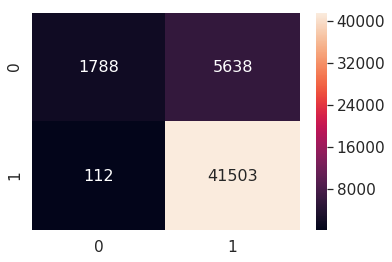

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_4, annot=True, annot_kws={'size':16}, fmt='g')

# Confusion matrix on test data :-

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Y_2))

[[  574  4885]
 [  428 30165]]


In [0]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

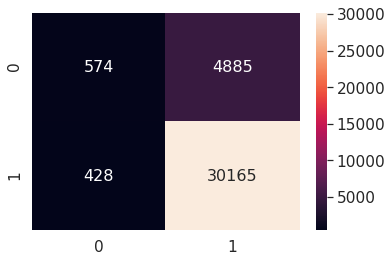

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_4, annot=True, annot_kws={'size':16}, fmt='g')

# GBDT on TFIDF Set 2:-

In [0]:
max_depth = [5, 10, 20, 50, 100] # Taking lower values because we need underfit modelss.
n_estimators = n_estimators = [5, 10, 50, 100, 500]

auc_1=[]
auc_2=[]

Tuning Best Hyperparameters:-

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(max_depth):
  for j in tqdm(n_estimators):
    clf=XGBClassifier(objective="binary:logistic",max_depth=i, n_estimators=j, n_jobs=-1, nthread=4)
    clf.fit(X_train_2, Ytr)
    Y_1=clf.predict_proba(X_train_2)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(X_cv_2)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)





  0%|          | 0/5 [00:00<?, ?it/s]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:13<00:53, 13.38s/it]




 40%|████      | 2/5 [00:33<00:46, 15.48s/it]




 60%|██████    | 3/5 [01:51<01:08, 34.19s/it]




 80%|████████  | 4/5 [04:20<01:08, 68.50s/it]




100%|██████████| 5/5 [15:52<00:00, 255.56s/it]








 20%|██        | 1/5 [15:52<1:03:28, 952.23s/it]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:20<01:20, 20.14s/it]




 40%|████      | 2/5 [00:54<01:13, 24.52s/it]




 60%|██████    | 3/5 [03:22<02:03, 61.51s/it]




 80%|████████  | 4/5 [08:09<02:09, 129.15s/it]




100%|██████████| 5/5 [30:43<00:00, 496.45s/it]








 40%|████      | 2/5 [46:35<1:00:58, 1219.51s/it]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:33<02:13, 33.40s/it]




 40%|████      | 2/5 [01:35<02:06, 42.12s/it]




 60%|██████    | 3/5 [06:15<03:46, 113.39s/it]




 80%|████████  | 4/5 [15:11<04:00, 240.15s/it]




100%|███

In [0]:
auc_1 = np.array(auc_1).reshape(len(n_estimators), len(max_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(max_depth))
print(auc_1)
print(auc_2)

[[0.71408457 0.73087642 0.81006687 0.85282781 0.96192824]
 [0.80774059 0.8517458  0.95752307 0.9811166  0.99994934]
 [0.93124128 0.97011082 0.99997829 0.99999945 1.        ]
 [0.98973615 0.99915978 1.         1.         1.        ]
 [0.99900663 0.99998354 1.         1.         1.        ]]
[[0.6772365  0.68590933 0.7203676  0.7313179  0.7361315 ]
 [0.68101679 0.69379944 0.72605974 0.73168952 0.73033985]
 [0.66404249 0.68417424 0.72769429 0.73250906 0.73488563]
 [0.63717198 0.66365555 0.7211487  0.7321206  0.73531345]
 [0.63164427 0.66072805 0.72286205 0.73339481 0.73776874]]


# HeatMap for best Hyperparameters selection:-

Text(0.5, 1.0, 'AUC on train data')

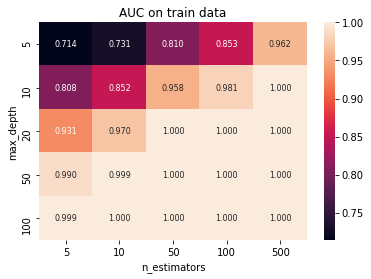

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on train data')

Text(0.5, 1.0, 'AUC on test data')

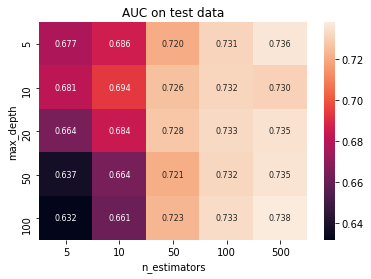

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on test data')

# ROC Curve:-

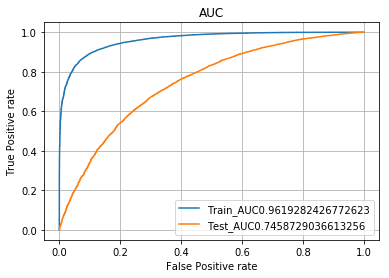

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=500)
clf.fit(X_train_2, Ytr)
Y_1=clf.predict_proba(X_train_2)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(X_test_2)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

# Observations:-

In [0]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(5, 500, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=5 and min_split=500 on train and test data are 0.9619282426772623 and 0.7458729036613256


# Confusion matrix on train data:-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=500)
clf.fit(X_train_2, Ytr)
Y_1=clf.predict(X_train_2)
Y_2=clf.predict(X_test_2)


In [0]:
print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))

Train confusion matrix
[[ 2215  5211]
 [   78 41537]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

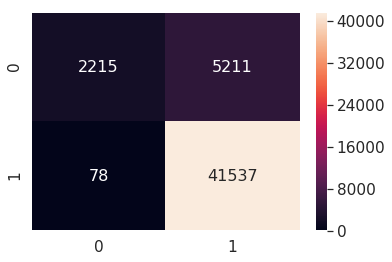

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={'size':16}, fmt='g')

# Confusion matrix on test data:-

In [0]:
print("="*100)
print("Test confusion matrix") 
print(confusion_matrix(Ytest, Y_2))

Test confusion matrix
[[  558  4901]
 [  464 30129]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

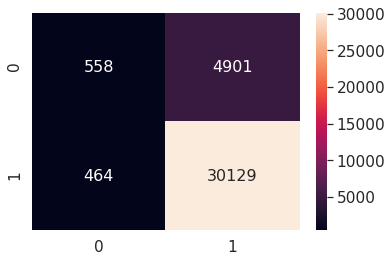

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_1, annot=True, annot_kws={'size':16}, fmt='g')

# GBDT on Set 3:-

In [0]:
max_depth = [5, 10, 20, 50, 100] # Taking lower values because we need underfit modelss.
n_estimators = n_estimators = [5, 10, 50, 100, 500]

auc_1=[]
auc_2=[]

Reducing the dimensions of the Avg W2V set as the computation takes large time.

Text(0, 0.5, 'cumulative explained variance')

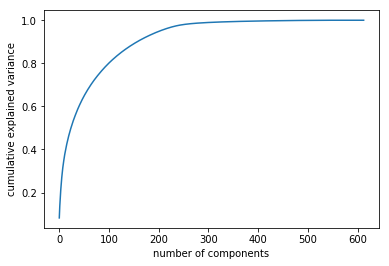

In [0]:


from sklearn.decomposition import PCA

pca = PCA(n_components = 613)

pca_data = pca.fit(X_train_3)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')

plt.ylabel('cumulative explained variance')

In [1]:
print('Even with 200 features, close to 95% of variance is retained.')

Even with 200 features, close to 95% of variance is retained.


In [0]:
pca = PCA(n_components=200)
pca_data_3 = pca.fit_transform(X_train_3)
pca_cv_data_3 = pca.transform(X_cv_3)
pca_test_data_3 = pca.transform(X_test_3)
print(pca_data_3.shape)
print(pca_cv_data_3.shape)
pca_test_data_3.shape


(49041, 200)
(24155, 200)


(36052, 200)

# Tuning Hyperparameters:-

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(max_depth):
  for j in tqdm(n_estimators):
    clf=XGBClassifier(objective="binary:logistic",max_depth=i, n_estimators=j, n_jobs=-1, nthread=4)
    clf.fit(pca_data_3, Ytr)
    Y_1=clf.predict_proba(pca_data_3)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(pca_cv_data_3)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)





  0%|          | 0/5 [00:00<?, ?it/s]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:06<00:26,  6.65s/it]




 40%|████      | 2/5 [00:18<00:24,  8.27s/it]




 60%|██████    | 3/5 [01:14<00:45, 22.54s/it]




 80%|████████  | 4/5 [03:04<00:48, 48.79s/it]




100%|██████████| 5/5 [12:10<00:00, 198.02s/it]








 20%|██        | 1/5 [12:10<48:43, 730.83s/it]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:12<00:51, 12.85s/it]




 40%|████      | 2/5 [00:37<00:49, 16.34s/it]




 60%|██████    | 3/5 [02:36<01:34, 47.15s/it]




 80%|████████  | 4/5 [06:33<01:44, 104.21s/it]




100%|██████████| 5/5 [25:24<00:00, 412.21s/it]








 40%|████      | 2/5 [37:35<48:26, 968.97s/it]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:25<01:42, 25.59s/it]




 40%|████      | 2/5 [01:16<01:39, 33.09s/it]




 60%|██████    | 3/5 [05:03<03:02, 91.26s/it]




 80%|████████  | 4/5 [12:25<03:16, 196.54s/it]




100%|█████████

In [0]:
auc_1 = np.array(auc_1).reshape(len(n_estimators), len(max_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(max_depth))
print(auc_1)
print(auc_2)


[[0.65593771 0.69355803 0.80590087 0.8647568  0.98517416]
 [0.8469053  0.91834082 0.99749946 0.99993204 1.        ]
 [0.98947486 0.99981429 1.         1.         1.        ]
 [0.99895518 0.99998744 1.         1.         1.        ]
 [0.99887933 0.99996651 1.         1.         1.        ]]
[[0.58862338 0.5973731  0.63110758 0.63671928 0.62615011]
 [0.57548325 0.58243949 0.61707049 0.61515255 0.6196069 ]
 [0.55358378 0.56484004 0.59936576 0.61207718 0.62565552]
 [0.55506436 0.56855879 0.6024075  0.61611557 0.62418574]
 [0.55256736 0.56534312 0.60099769 0.6114352  0.62265137]]


# Heatmap for best hyperparameters selection:-

Text(0.5, 1.0, 'AUC on train data')

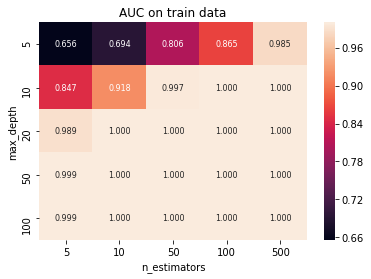

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on train data')

Text(0.5, 1.0, 'AUC on test data')

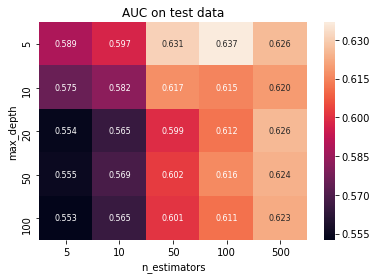

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on test data')

In [0]:
print('The best AUC score ocurrs on max depth=5 and n_estimators=100')

The best AUC score ocurrs on max depth=5 and n_estimators=100


# ROC Curve :-

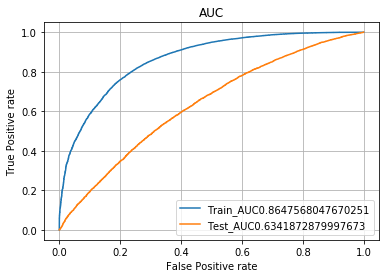

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=100)
clf.fit(pca_data_3, Ytr)
Y_1=clf.predict_proba(pca_data_3)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(pca_test_data_3)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [0]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(5, 100, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=5 and min_split=100 on train and test data are 0.8647568047670251 and 0.6341872879997673


# Confusion Matrix on Train data:-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=100)
clf.fit(pca_data_3, Ytr)
Y_1=clf.predict(pca_data_3)
Y_2=clf.predict(pca_test_data_3)

In [0]:
print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))

Train confusion matrix
[[  148  7278]
 [    0 41615]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

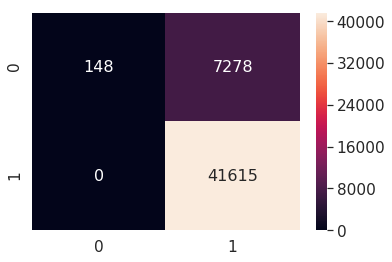

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on Test data:-

In [0]:
print("="*100)
print("Test confusion matrix") 
print(confusion_matrix(Ytest, Y_2))

Test confusion matrix
[[    3  5456]
 [   13 30580]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

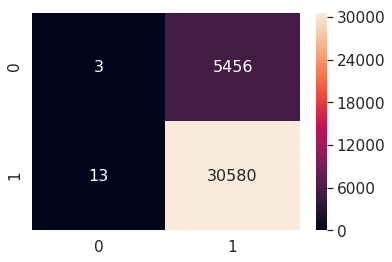

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_1, annot=True, annot_kws={'size':16}, fmt='g')

# GBDT on SET 4 TFIDF W2V:-

In [0]:
max_depth = [5, 10, 20, 50, 100] # Taking lower values because we need underfit modelss.
n_estimators = n_estimators = [5, 10, 50, 100, 500]

auc_1=[]
auc_2=[]

Reducing the no of dimensions  for TFIDF W2V:-

Text(0, 0.5, 'cumulative explained variance')

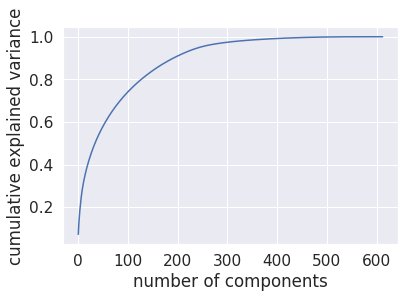

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 613)

pca_data = pca.fit(X_train_4)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')

plt.ylabel('cumulative explained variance')

In [0]:
print('Even with 250 features, 95% of variance is retained.')

Even with 250 features, 95% of variance is retained.


In [0]:
pca = PCA(n_components=250)
pca_data_4 = pca.fit_transform(X_train_4)
pca_cv_data_4 = pca.transform(X_cv_4)
pca_test_data_4 = pca.transform(X_test_4)
print(pca_data_4.shape)
print(pca_cv_data_4.shape)
pca_test_data_4.shape

(49041, 250)
(24155, 250)


(36052, 250)

# Tuning Hyperparameters:-

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(max_depth):
  for j in tqdm(n_estimators):
    clf=XGBClassifier(objective="binary:logistic",max_depth=i, n_estimators=j, n_jobs=-2, nthread=4)
    clf.fit(pca_data_4, Ytr)
    Y_1=clf.predict_proba(pca_data_4)
    roc_auc_1=roc_auc_score(Ytr, Y_1[:,1])
    auc_1.append(roc_auc_1)
    Y_2=clf.predict_proba(pca_cv_data_4)
    roc_auc_2=roc_auc_score(Ycv, Y_2[:,1])
    auc_2.append(roc_auc_2)





  0%|          | 0/5 [00:00<?, ?it/s]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:07<00:31,  7.98s/it]




 40%|████      | 2/5 [00:23<00:30, 10.15s/it]




 60%|██████    | 3/5 [01:36<00:58, 29.11s/it]




 80%|████████  | 4/5 [04:02<01:04, 64.16s/it]




100%|██████████| 5/5 [15:55<00:00, 258.71s/it]








 20%|██        | 1/5 [15:55<1:03:40, 955.15s/it]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:16<01:04, 16.17s/it]




 40%|████      | 2/5 [00:46<01:01, 20.42s/it]




 60%|██████    | 3/5 [03:16<01:58, 59.40s/it]




 80%|████████  | 4/5 [08:26<02:14, 134.43s/it]




100%|██████████| 5/5 [32:00<00:00, 518.41s/it]








 40%|████      | 2/5 [47:55<1:02:14, 1244.83s/it]




  0%|          | 0/5 [00:00<?, ?it/s]




 20%|██        | 1/5 [00:31<02:07, 31.93s/it]




 40%|████      | 2/5 [01:35<02:04, 41.52s/it]




 60%|██████    | 3/5 [06:25<03:52, 116.00s/it]




 80%|████████  | 4/5 [15:37<04:06, 246.66s/it]




100%|███

In [0]:
auc_1 = np.array(auc_1).reshape(len(n_estimators), len(max_depth))
auc_2 = np.array(auc_2).reshape(len(n_estimators), len(max_depth))
print(auc_1)
print(auc_2)

[[0.66698983 0.69884425 0.82318321 0.88474175 0.98674942]
 [0.86092447 0.9340597  0.99974151 0.99999962 1.        ]
 [0.99109013 0.99978872 1.         1.         1.        ]
 [0.99925753 0.99999353 1.         1.         1.        ]
 [0.99920961 0.99999712 1.         1.         1.        ]]
[[0.58737738 0.60229631 0.63597326 0.64470867 0.63982412]
 [0.58246932 0.59622333 0.63288638 0.63103038 0.64049226]
 [0.55878614 0.5710738  0.61124016 0.63047718 0.6467057 ]
 [0.54957167 0.56620657 0.6124183  0.63097486 0.64807398]
 [0.54625612 0.56518654 0.61200796 0.62864358 0.64441558]]


# HeatMap for best hyperparameter selection:-

Text(0.5, 1.0, 'AUC on train data')

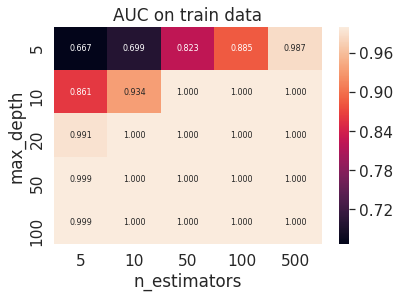

In [0]:
sns.heatmap(auc_1, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on train data')

Text(0.5, 1.0, 'AUC on test data')

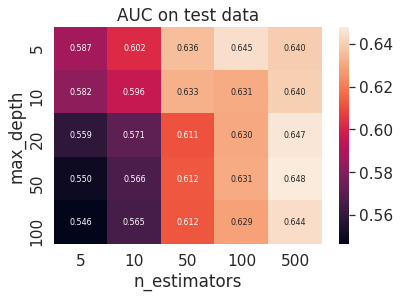

In [0]:
sns.heatmap(auc_2, fmt='.3f', annot=True, annot_kws={'size':8}, xticklabels=n_estimators, yticklabels=max_depth)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC on test data')

# Observations:-

In [1]:
print('The best AUC score ocurrs on max depth=5 and n_estimators=100 as the train AUC is not 1 (overfit) at the selected values and the CV AUC is also good')

The best AUC score ocurrs on max depth=5 and n_estimators=100 as the train AUC is not 1 (overfit) at the selected values and the CV AUC is also good


# ROC Curve:-

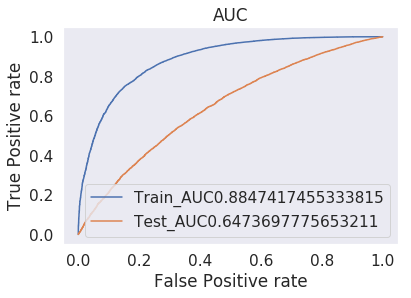

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=100)
clf.fit(pca_data_4, Ytr)
Y_1=clf.predict_proba(pca_data_4)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y1)
Y_2=clf.predict_proba(pca_test_data_4)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [0]:
print(' The AUC scores with best depth={} and min_split={} on train and test data are {} and {}'.format(5, 100, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best depth=5 and min_split=100 on train and test data are 0.8847417455333815 and 0.6473697775653211


# Confusion Matrix on train data:-

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=XGBClassifier(objective="binary:logistic",max_depth=5, n_estimators=100)
clf.fit(pca_data_4, Ytr)
Y_1=clf.predict(pca_data_4)
Y_2=clf.predict(pca_test_data_4)

In [0]:
print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))

Train confusion matrix
[[  119  7307]
 [    0 41615]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

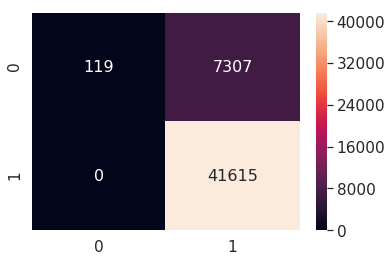

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on Test data:-

In [0]:
print("="*100)
print("Test confusion matrix") 
print(confusion_matrix(Ytest, Y_2))

Test confusion matrix
[[    6  5453]
 [   10 30583]]


In [0]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(Ytest, Y_2))

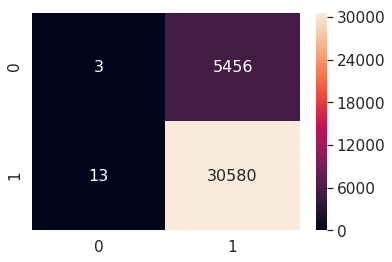

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_1, annot=True, annot_kws={'size':16}, fmt='g')

# Pretty Table for summary of RF and GBDT results:-

In [8]:
from prettytable import PrettyTable

In [9]:
x = PrettyTable()

In [10]:
x.field_names = ['Technique', 'max depth', 'no of estimators', 'Train AUC', 'Test AUC']

In [11]:
x.add_row(['RF-BOW', '100', '500', '1', '0.74'])
x.add_row(['RF-TFIDF', '100', '500', '1', '0.732'])
x.add_row(['RF-Avg-W2V', '10', '500', '0.97', '0.71'])
x.add_row(['RF-TFIDF-W2V', '100', '500', '0.96', '0.69'])
x.add_row(['GBDT-BOW', '5', '500', '0.94', '0.75'])
x.add_row(['GBDT-TFIDF', '5', '500', '0.96', '0.745'])
x.add_row(['GBDT-Avg-W2V', '5', '100', '0.87', '0.64'])
x.add_row(['GBDT-TFIDF-W2V', '5', '100', '0.89', '0.65'])

In [13]:
print(x)

+----------------+-----------+------------------+-----------+----------+
|   Technique    | max depth | no of estimators | Train AUC | Test AUC |
+----------------+-----------+------------------+-----------+----------+
|     RF-BOW     |    100    |       500        |     1     |   0.74   |
|    RF-TFIDF    |    100    |       500        |     1     |  0.732   |
|   RF-Avg-W2V   |     10    |       500        |    0.97   |   0.71   |
|  RF-TFIDF-W2V  |    100    |       500        |    0.96   |   0.69   |
|    GBDT-BOW    |     5     |       500        |    0.94   |   0.75   |
|   GBDT-TFIDF   |     5     |       500        |    0.96   |  0.745   |
|  GBDT-Avg-W2V  |     5     |       100        |    0.87   |   0.64   |
| GBDT-TFIDF-W2V |     5     |       100        |    0.89   |   0.65   |
+----------------+-----------+------------------+-----------+----------+


# Conclusions:-